# Coursework 1
### 1.1.1

In [101]:
import pandas as pd
climbingStats = pd.read_csv("data/climbing_statistics.csv")

climbingStats.head()

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0


In [102]:
climbingStats.dropna(inplace=True)          #drop rows with missing values

climbingStats.drop(climbingStats[climbingStats['Attempted']<climbingStats['Succeeded']].index, inplace=True)    #drop rows where the number of successes is greater than the number of attempts
climbingStats.drop('Success Percentage', axis=1, inplace=True)
climbingStats['DateRoute'] = climbingStats['Date'] + climbingStats['Route']

aggregator = {'Date':'first','Route':'first','Attempted':'sum','Succeeded':'sum'}
climbingStats = climbingStats.groupby('DateRoute').aggregate(aggregator)

climbingStats['Success Percentage'] = climbingStats['Succeeded']/climbingStats['Attempted']

climbingStats.reset_index(drop=True,inplace=True)

climbingStats.head()

,Date,Route,Attempted,Succeeded,Success Percentage
0,1/16/2014,Little Tahoma,2,0,0.0
1,1/18/2014,Gibralter Ledges,8,4,0.5
2,1/19/2014,Gibralter Ledges,2,0,0.0
3,1/20/2014,Fuhrer's Finger,2,0,0.0
4,1/23/2014,Little Tahoma,2,0,0.0


### 1.1.2

In [103]:
weatherStats = pd.read_csv("data/Rainier_Weather.csv")

weatherStats.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,12/31/2015,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,12/30/2015,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,12/29/2015,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,12/28/2015,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,12/27/2015,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708


In [104]:
weatherStats.dropna(inplace=True)
weatherStats.drop('Battery Voltage AVG',axis=1,inplace=True)
weatherStats.head()

,Date,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,12/31/2015,19.062917,21.870833,21.977792,62.325833,84.915292
1,12/30/2015,14.631208,18.493833,3.540542,121.505417,86.192833
2,12/29/2015,6.614292,34.072917,0.000000,130.291667,85.100917
3,12/28/2015,8.687042,70.557917,0.000000,164.683750,86.241250
4,12/27/2015,14.140417,95.754167,0.000000,268.479167,31.090708


### 1.1.3

In [105]:
combinedStats = pd.merge(climbingStats,weatherStats,on='Date')
combinedStats['Date'] = pd.to_datetime(combinedStats['Date'], infer_datetime_format=True)   #convert Date to be an actual date rather than a string
combinedStats.sort_values(by='Date',inplace=True)

combinedStats.head()

,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
460,2014-09-23,Disappointment Cleaver,11,0,0.000000,32.857333,100.000000,65.110667,254.273333,16.593800
462,2014-09-24,Disappointment Cleaver,12,0,0.000000,29.702917,100.000000,45.915000,278.054167,37.873708
464,2014-09-25,Disappointment Cleaver,14,8,0.571429,26.823750,99.854167,3.166208,278.604167,142.698917
466,2014-09-26,Disappointment Cleaver,41,19,0.463415,28.238333,100.000000,0.897625,259.645833,114.400833
468,2014-09-27,Disappointment Cleaver,44,25,0.568182,33.318750,60.200417,7.140917,116.294583,227.597125


### 1.2.1

C:\Users\enric\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


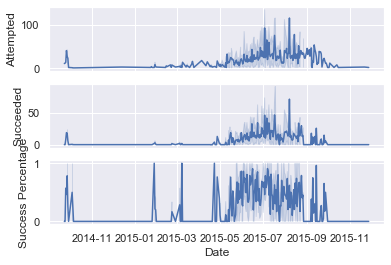

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn-deep')

figure, axes = plt.subplots(3,1,sharex=True)

sns.lineplot('Date','Attempted',data=combinedStats,ax=axes[0])
sns.lineplot('Date','Succeeded',data=combinedStats,ax=axes[1])
sns.lineplot('Date','Success Percentage',data=combinedStats,ax=axes[2])
plt.show()

### 1.2.2

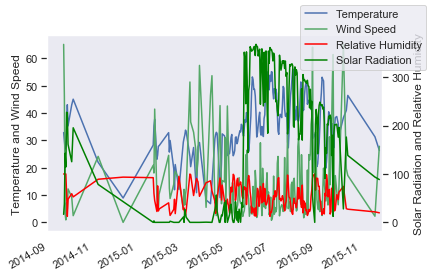

In [108]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot('Date','Temperature AVG',data=combinedStats,label="Temperature")
ax.plot('Date','Wind Speed Daily AVG',data=combinedStats,label="Wind Speed")
ax.grid(False)
ax.set_ylabel('Temperature and Wind Speed')



ax2 = ax.twinx()
ax2.grid(False)
ax2.plot('Date','Relative Humidity AVG',data=combinedStats,color='red',label="Relative Humidity")
ax2.plot('Date','Solar Radiation AVG',data=combinedStats,color='green',label="Solar Radiation")
ax2.set_ylabel('Solar Radiation and Relative Humidity')

ax.figure.legend()
plt.xlim(datetime.strptime('2014 Sep','%Y %b'),datetime.strptime('2015 Dec','%Y %b'))
fig.autofmt_xdate()     #format the xticks
plt.show()

### 1.2.3
# This needs fixing

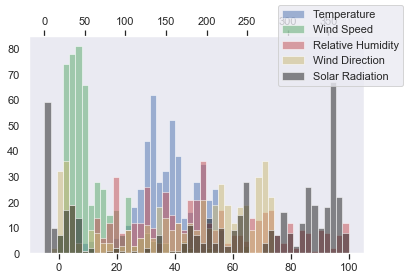

In [127]:
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twiny()
ax2.grid(False)
ax.grid(False)

bins1 = np.linspace(-5,100,50)
ax.hist(combinedStats['Temperature AVG'], bins1, label="Temperature",alpha=0.5)
ax.hist(combinedStats['Wind Speed Daily AVG'], bins1, label="Wind Speed",alpha=0.5)
ax.hist(combinedStats['Relative Humidity AVG'], bins1, label="Relative Humidity",alpha=0.5)


bins2 = np.linspace(0,375,50)
ax2.hist(combinedStats['Wind Direction AVG'], bins2,label="Wind Direction",alpha=0.5,color='y')
ax2.hist(combinedStats['Solar Radiation AVG'], bins2,label="Solar Radiation",alpha=0.5,color='k')

fig.legend()
plt.show()

In [ ]:
### 1.3

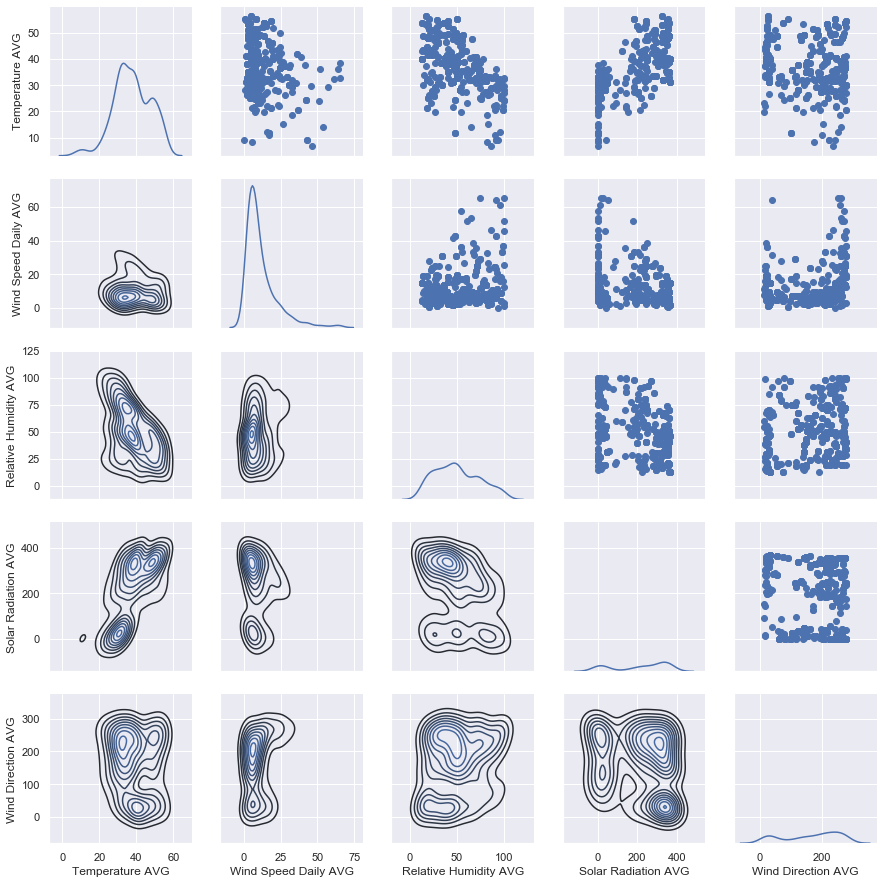

In [135]:
g = sns.PairGrid(combinedStats[['Temperature AVG','Wind Speed Daily AVG','Relative Humidity AVG','Solar Radiation AVG','Wind Direction AVG']])
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.scatter)
plt.show()